# PROJECT SUMMARY

An american  distributor of technological solutions, which operates in the Caribbean and Latin America, requires a better understanding and further improvemente related to costs of transportation, logistics and storage.

In the following case of study, we will process the data of purchase and sales of a three year period of the company for analysis and modeling to obtain a prediction of stock quantity limit that supply chain department should have as a guidleine to avoid overstock of product that do not sales well.


 **Objective**: Prediction of inventory quantity to purchase by type of products


  **Target**:  Quantity of units available in the warehouse


### DATA:

  ***Disclaimer:***
  **Data used in this project is real data from a company, therefore data files are unable to be published for confidiantily reasons.**

- 'Purchase_PO_report':  Purchase order process to a supplier from 2017 and 2019
- 'POS_Sales_report': Sales of this supplier products from 2017 and 2019.

# PRE-PROCESSING DATA

Load the data of purchase and sales

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving PO_report_Family_Capstone_II.csv to PO_report_Family_Capstone_II.csv
Saving Margen de error.csv to Margen de error.csv
Saving Sales_report_Fortinet_Capstone_B.csv to Sales_report_Fortinet_Capstone_B.csv


## PRE-PROCESSING DATA OF PURCHASE ORDERS

In [ ]:
purchase_report = pd.read_csv("PO_report_Family_Capstone_II.csv", encoding='latin-1')

In [ ]:
purchase_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6283 entries, 0 to 6282
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Region                 6283 non-null   object 
 1   Business Unit          6283 non-null   object 
 2   PONumber               6283 non-null   object 
 3   License Uploaded       6282 non-null   object 
 4   Reseller               6246 non-null   object 
 5   End User               6239 non-null   object 
 6   Reseller HQ            6246 non-null   object 
 7   multinacional  Y/N     6246 non-null   object 
 8   GRANDE                 6246 non-null   object 
 9   Vendor                 6283 non-null   object 
 10  Operation Type         6283 non-null   object 
 11  PO SBA#                3047 non-null   object 
 12  Is CBN                 6283 non-null   bool   
 13  POStatus               6283 non-null   object 
 14  PODate                 6283 non-null   object 
 15  Crea

In [ ]:
purchase_clean = purchase_report.copy()

In [ ]:
purchase_clean.columns

Index(['Region', 'Business Unit', 'PONumber', 'License Uploaded', 'Reseller',
       'End User', 'Reseller HQ', 'multinacional  Y/N', 'GRANDE', 'Vendor',
       'Operation Type', 'PO SBA#', 'Is CBN', 'POStatus', 'PODate',
       'Created By', 'Sales Order', 'SO Accepted Date', 'Item', 'Family',
       'Item Type', 'Item Description', 'Qty', 'List Price', 'PO Discount',
       'Unit ext cost', 'Total ext cost', 'On Order Qty', 'On Order Date',
       'Shipped Qty', 'Shipped Date', 'Stock USQty', 'Stock USDate',
       'Customs Qty', 'Customs Date', 'Last Hop Transit Qty',
       'Last Hop Transit Date', 'Received Qty', 'Received Date', 'PO Obs',
       'PO Purpose', 'Dolar Vendor'],
      dtype='object')

Cleaning of non necessary columns and remaming of columns

In [ ]:
purchase_clean = purchase_clean.drop(['Region', 'Business Unit', 'License Uploaded','Operation Type', 'PO SBA#', 'Is CBN', 'POStatus', 'Created By', 'Shipped Qty', 'Last Hop Transit Qty', 'Item Description', 'Last Hop Transit Date', 'PO Obs', 'Dolar Vendor', 'Vendor', 'On Order Qty', 'On Order Date', 'Shipped Date', 'Stock USQty', 'Customs Qty', 'Customs Date', 'Received Qty', 'Received Date', 'List Price', 'PO Discount', 'Total ext cost'], axis = 1)

In [ ]:
purchase_clean.columns

Index(['PONumber', 'Reseller', 'End User', 'Reseller HQ', 'multinacional  Y/N',
       'GRANDE', 'PODate', 'Sales Order', 'SO Accepted Date', 'Item', 'Family',
       'Item Type', 'Qty', 'Unit ext cost', 'Stock USDate', 'PO Purpose'],
      dtype='object')

In [ ]:
renamed_columns = (['PO_Number', 'Customer_Name', 'Customer_Client_Name', 'Customer_HQ', 'Multinational', 'Top_Client', 'PO_Date', 'Sales_Order_Code',
       'Sales_Order_Accepted_Date', 'Item_Code', 'Family_Product', 'Item_Type',
       'PO_Product_Qty', 'Unit_Cost', 'WH_Received_Date','PO_Purpose'])

In [ ]:
purchase_clean.columns = renamed_columns

In [ ]:
purchase_clean.columns

Index(['PO_Number', 'Customer_Name', 'Customer_Client_Name', 'Customer_HQ',
       'Multinational', 'Top_Client', 'PO_Date', 'Sales_Order_Code',
       'Sales_Order_Accepted_Date', 'Item_Code', 'Family_Product', 'Item_Type',
       'PO_Product_Qty', 'Unit_Cost', 'WH_Received_Date', 'PO_Purpose'],
      dtype='object')

In [ ]:
purchase_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6283 entries, 0 to 6282
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PO_Number                  6283 non-null   object 
 1   Customer_Name              6246 non-null   object 
 2   Customer_Client_Name       6239 non-null   object 
 3   Customer_HQ                6246 non-null   object 
 4   Multinational              6246 non-null   object 
 5   Top_Client                 6246 non-null   object 
 6   PO_Date                    6283 non-null   object 
 7   Sales_Order_Code           6246 non-null   float64
 8   Sales_Order_Accepted_Date  6283 non-null   object 
 9   Item_Code                  6283 non-null   object 
 10  Family_Product             6266 non-null   object 
 11  Item_Type                  6283 non-null   object 
 12  PO_Product_Qty             6283 non-null   int64  
 13  Unit_Cost                  6283 non-null   float

We ensure that data is just for hardware product and no software, as we nee dto work with tangible product that can be stored in the warehouse. 

In [ ]:
purchase_clean['Item_Type'].unique()

array(['Hardware'], dtype=object)

In [ ]:
purchase_clean['Unit_Cost'] = purchase_clean['Unit_Cost'].astype(float)

We must change necessary the data type of Sales ID column

In [ ]:
purchase_clean['Sales_Order_Code'] = purchase_clean['Sales_Order_Code'].fillna(0)

In [ ]:
purchase_clean['Sales_Order_Code'] = purchase_clean['Sales_Order_Code'].astype(int)

In [ ]:
purchase_clean['Sales_Order_Code'] = purchase_clean['Sales_Order_Code'].astype(str)
purchase_clean['Sales_Order_Code'].head()

0    348982
1    348843
2    349127
3    348936
4    348936
Name: Sales_Order_Code, dtype: object

#### **Purchase check point**

In [ ]:
purchase = purchase_clean.copy()
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6283 entries, 0 to 6282
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PO_Number                  6283 non-null   object 
 1   Customer_Name              6246 non-null   object 
 2   Customer_Client_Name       6239 non-null   object 
 3   Customer_HQ                6246 non-null   object 
 4   Multinational              6246 non-null   object 
 5   Top_Client                 6246 non-null   object 
 6   PO_Date                    6283 non-null   object 
 7   Sales_Order_Code           6283 non-null   object 
 8   Sales_Order_Accepted_Date  6283 non-null   object 
 9   Item_Code                  6283 non-null   object 
 10  Family_Product             6266 non-null   object 
 11  Item_Type                  6283 non-null   object 
 12  PO_Product_Qty             6283 non-null   int64  
 13  Unit_Cost                  6283 non-null   float

We check if data corresponds to 2017 - 2019 purchase period.


In [ ]:
from datetime import datetime as dt

In [ ]:
purchase['PO_Date'] = pd.to_datetime(purchase['PO_Date'])

In [ ]:
purchase.PO_Date.dt.year.unique()

array([2017, 2018, 2019])

Let's check null values

In [ ]:
purchase.isnull().sum()

PO_Number                       0
Customer_Name                  37
Customer_Client_Name           44
Customer_HQ                    37
Multinational                  37
Top_Client                     37
PO_Date                         0
Sales_Order_Code                0
Sales_Order_Accepted_Date       0
Item_Code                       0
Family_Product                 17
Item_Type                       0
PO_Product_Qty                  0
Unit_Cost                       0
WH_Received_Date             1023
PO_Purpose                      0
dtype: int64

We drop the Family_Products as it is an error from original data (confirmed by company), the rest of the null values does not affect of has relevant information like, WH_Received_Date ("Warehouse received date") which means that those units are ordered but have not arrived to the warehouse yet.

In [ ]:
purchase = purchase.drop(purchase[purchase['Family_Product'].isnull()].index)
purchase.isnull().sum()

PO_Number                       0
Customer_Name                  37
Customer_Client_Name           44
Customer_HQ                    37
Multinational                  37
Top_Client                     37
PO_Date                         0
Sales_Order_Code                0
Sales_Order_Accepted_Date       0
Item_Code                       0
Family_Product                  0
Item_Type                       0
PO_Product_Qty                  0
Unit_Cost                       0
WH_Received_Date             1022
PO_Purpose                      0
dtype: int64

## PRE-PROCESSING DATA SALES



In [ ]:
sales_report = pd.read_csv("Sales_report_Fortinet_Capstone_B.csv", encoding='utf-8')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25,26,33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
sales_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41112 entries, 0 to 41111
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ERP_Name                    41112 non-null  object 
 1   Vendor                      41112 non-null  object 
 2   Sales_Order_Date            41112 non-null  object 
 3   Sales_Order_Number          41112 non-null  int64  
 4   Distributor_InvoiceDate     41112 non-null  object 
 5   Distributor_Invoice_Number  41112 non-null  int64  
 6   Reseller_Name               41112 non-null  object 
 7   Reseller_Address_1          41112 non-null  object 
 8   Reseller_Address_2          40676 non-null  object 
 9   Reseller_City               40676 non-null  object 
 10  Reseller_State_or_Province  40761 non-null  object 
 11  Reseller_Postal_Code        34333 non-null  object 
 12  Reseller_Country            41112 non-null  object 
 13  Reseller_Contact_Name1      342

In [ ]:
sales_clean = sales_report.copy()

In [ ]:
sales_clean.columns

Index(['ERP_Name', 'Vendor', 'Sales_Order_Date', 'Sales_Order_Number',
       'Distributor_InvoiceDate', 'Distributor_Invoice_Number',
       'Reseller_Name', 'Reseller_Address_1', 'Reseller_Address_2',
       'Reseller_City', 'Reseller_State_or_Province', 'Reseller_Postal_Code',
       'Reseller_Country', 'Reseller_Contact_Name1', 'Reseller_Contact_Email',
       'Reseller_Contact_Telephone', 'End__User_Name', 'End_User_Address1',
       'End_User_City', 'End_User_Postal_Code', 'End_User_State_or_Province',
       'Item_Code', 'Family', 'Item_Description', 'Quantity_Sold',
       'Invoice_Item_Unit_Value', 'Invoice_Item_Total_Value', 'SBADiscount',
       'SOPurchaseDiscountPercent', 'SBANumber', 'Final_Observations',
       'DistributorToVendorPO', 'NumeroDeSerie', 'ExtendedPurchasePrice'],
      dtype='object')

Cleaning of non necessary columns and renaming of columns

In [ ]:
sales_clean=sales_clean.drop(['ERP_Name', 'Reseller_Address_1', 'Reseller_Address_2',
       'Reseller_City','Reseller_Postal_Code','Reseller_Contact_Name1', 'Reseller_Contact_Email',
       'Reseller_Contact_Telephone', 'End__User_Name', 'End_User_Address1',
       'End_User_City', 'End_User_Postal_Code', 'End_User_State_or_Province', 'SBANumber',
       'Final_Observations', 'Vendor', 'Sales_Order_Date', 'Reseller_Name',
       'Reseller_State_or_Province', 'Invoice_Item_Total_Value' , 'SBADiscount', 
       'SOPurchaseDiscountPercent', 'Final_Observations', 'NumeroDeSerie', 'ExtendedPurchasePrice', 'Item_Description', 'Family'],axis=1)

In [ ]:
sales_clean.columns

Index(['Sales_Order_Number', 'Distributor_InvoiceDate',
       'Distributor_Invoice_Number', 'Reseller_Country', 'Item_Code',
       'Quantity_Sold', 'Invoice_Item_Unit_Value', 'DistributorToVendorPO'],
      dtype='object')

In [ ]:
renamed_sales_columns = (['Sales_Order_Code', 'Distributor_Invoice_Date',
       'Sales_Invoice_Number', 'Sales_Country', 'Item_Code',
       'Sales_Qty', 'Sales_unit_price',
       'PO_Number'])

In [ ]:
sales_clean.columns = renamed_sales_columns

In [ ]:
sales_clean['PO_Number'] = sales_clean.PO_Number.str.strip()

In [ ]:
sales_clean['PO_Number'] = sales_clean.PO_Number.str.slice(start=0, stop=13)

Same as purchase, we must change necessary the format of Sales ID column

In [ ]:
sales_clean['Sales_Order_Code'] = sales_clean['Sales_Order_Code'].astype(str)
sales_clean['Sales_Order_Code'].head()

0    363342
1    382884
2    440423
3    565682
4    578038
Name: Sales_Order_Code, dtype: object

#### **Sales checkpoint**

In [ ]:
sales = sales_clean.copy()
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41112 entries, 0 to 41111
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sales_Order_Code          41112 non-null  object
 1   Distributor_Invoice_Date  41112 non-null  object
 2   Sales_Invoice_Number      41112 non-null  int64 
 3   Sales_Country             41112 non-null  object
 4   Item_Code                 41112 non-null  object
 5   Sales_Qty                 41112 non-null  int64 
 6   Sales_unit_price          41112 non-null  object
 7   PO_Number                 40911 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.5+ MB


We check if data corresponds to 2017 - 2019 sales period.

In [ ]:
sales['Distributor_Invoice_Date'] = pd.to_datetime(sales['Distributor_Invoice_Date'])

In [ ]:
sales.Distributor_Invoice_Date.dt.year.unique()

array([2017, 2018, 2019, 2020])

In [ ]:
sales = sales.drop(sales[sales.Distributor_Invoice_Date.dt.year == 2020].index)

In [ ]:
sales.Distributor_Invoice_Date.dt.year.unique()

array([2017, 2018, 2019])

We drop the Family_Products as it is an error from original data (confirmed by company), the rest of the null values does not affect of has relevant information. 

In this case, non all sales are registered with customer names.

From columns 'PO_Number' of sales files, rows taht are empty means that are chargebacks, so we proveed to drop them.


In [ ]:
sales.isnull().sum()

Sales_Order_Code             0
Distributor_Invoice_Date     0
Sales_Invoice_Number         0
Sales_Country                0
Item_Code                    0
Sales_Qty                    0
Sales_unit_price             0
PO_Number                   39
dtype: int64

In [ ]:
sales = sales.drop(sales[sales.PO_Number.isnull()].index)
sales.isnull().sum()

Sales_Order_Code            0
Distributor_Invoice_Date    0
Sales_Invoice_Number        0
Sales_Country               0
Item_Code                   0
Sales_Qty                   0
Sales_unit_price            0
PO_Number                   0
dtype: int64

## MERGING BOTH DATA SETS  

#### In order to have a global vision of sales and purchase, we proceed to merge both datasets so we can have more insightful information. 

We create the primary key in each dataset so merge can be done.

* The Primary key in both dataset will be the combination of PurchaseID + Product code + SalesID

In [ ]:
sales['Key'] = sales['PO_Number'] + sales["Item_Code"] + sales["Sales_Order_Code"]

In [ ]:
sales['Key'].head()

0     FN228342FN-BMANT-O6ABGN-0606-O363342
1        FN242012FN-PACBL3-3NMRPMSMA382884
2                FN286344FN-BMAP832I440423
3     FN387793FN-TCANT-O6ABGN-0606-O565682
4    FN396657FN-BMANT-O6ABGN-0607-PT578038
Name: Key, dtype: object

In [ ]:
purchase['Key'] = purchase['PO_Number'] + purchase["Item_Code"] + purchase["Sales_Order_Code"]
purchase['Key']

0               FN217739FN-PAFG-60E-BDL348982
1               FN217741FN-HNFAP-221C-N348843
2       FN217745FN-PRFG-100D-BDL-900-36349127
3              FN217852FN-SVFG-100E-NFR348936
4               FN217852FN-SVFG-60E-NFR348936
                        ...                  
6278    FN438051FN-USFG-101F-BDL-950-12633084
6279     FN438051FN-USFG-61F-BDL-950-12633084
6280          FN438051FN-USFS-124E-FPOE633084
6281          FN438051FN-USFS-224D-FPOE633084
6282     FN438058FN-USFG-60F-BDL-950-36633070
Name: Key, Length: 6266, dtype: object

In [ ]:
purch_sales = pd.merge(purchase, sales, on = 'Key', how = 'left', suffixes=('_Purchase', '_Sales'))
purch_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26895 entries, 0 to 26894
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   PO_Number_Purchase         26895 non-null  object        
 1   Customer_Name              26858 non-null  object        
 2   Customer_Client_Name       26850 non-null  object        
 3   Customer_HQ                26858 non-null  object        
 4   Multinational              26858 non-null  object        
 5   Top_Client                 26858 non-null  object        
 6   PO_Date                    26895 non-null  datetime64[ns]
 7   Sales_Order_Code_Purchase  26895 non-null  object        
 8   Sales_Order_Accepted_Date  26895 non-null  object        
 9   Item_Code_Purchase         26895 non-null  object        
 10  Family_Product             26895 non-null  object        
 11  Item_Type                  26895 non-null  object        
 12  PO_P

In [ ]:
purch_sales.isnull().sum()

PO_Number_Purchase              0
Customer_Name                  37
Customer_Client_Name           45
Customer_HQ                    37
Multinational                  37
Top_Client                     37
PO_Date                         0
Sales_Order_Code_Purchase       0
Sales_Order_Accepted_Date       0
Item_Code_Purchase              0
Family_Product                  0
Item_Type                       0
PO_Product_Qty                  0
Unit_Cost                       0
WH_Received_Date             2686
PO_Purpose                      0
Key                             0
Sales_Order_Code_Sales        604
Distributor_Invoice_Date      604
Sales_Invoice_Number          604
Sales_Country                 604
Item_Code_Sales               604
Sales_Qty                     604
Sales_unit_price              604
PO_Number_Sales               604
dtype: int64

We proceed to change the data type of columns required.

In [ ]:
purch_sales['PO_Date'] = pd.to_datetime(purch_sales['PO_Date'])
purch_sales['Sales_Order_Accepted_Date']  = pd.to_datetime(purch_sales['Sales_Order_Accepted_Date'])
purch_sales['WH_Received_Date'] = pd.to_datetime(purch_sales['WH_Received_Date']) 
purch_sales['Distributor_Invoice_Date'] = pd.to_datetime(purch_sales['Distributor_Invoice_Date'])

In [ ]:
purch_sales.isnull().sum()

PO_Number_Purchase              0
Customer_Name                  37
Customer_Client_Name           45
Customer_HQ                    37
Multinational                  37
Top_Client                     37
PO_Date                         0
Sales_Order_Code_Purchase       0
Sales_Order_Accepted_Date       0
Item_Code_Purchase              0
Family_Product                  0
Item_Type                       0
PO_Product_Qty                  0
Unit_Cost                       0
WH_Received_Date             2686
PO_Purpose                      0
Key                             0
Sales_Order_Code_Sales        604
Distributor_Invoice_Date      604
Sales_Invoice_Number          604
Sales_Country                 604
Item_Code_Sales               604
Sales_Qty                     604
Sales_unit_price              604
PO_Number_Sales               604
dtype: int64

*3rd Checkpoint*

In [ ]:
df = purch_sales.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26895 entries, 0 to 26894
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   PO_Number_Purchase         26895 non-null  object        
 1   Customer_Name              26858 non-null  object        
 2   Customer_Client_Name       26850 non-null  object        
 3   Customer_HQ                26858 non-null  object        
 4   Multinational              26858 non-null  object        
 5   Top_Client                 26858 non-null  object        
 6   PO_Date                    26895 non-null  datetime64[ns]
 7   Sales_Order_Code_Purchase  26895 non-null  object        
 8   Sales_Order_Accepted_Date  26895 non-null  datetime64[ns]
 9   Item_Code_Purchase         26895 non-null  object        
 10  Family_Product             26895 non-null  object        
 11  Item_Type                  26895 non-null  object        
 12  PO_P

Now, to have more insightfull information for the model,  we create the following Synthetic Variables:

- Total Extended Cost: Total cost amount per sales
- Days in Warehouse: Qunatity of days that product remains in the warehouse until sale.
- Total Extended Sale: Total sale amount per sales

In [ ]:
df.Sales_unit_price = pd.to_numeric(df.Sales_unit_price, errors='coerce').astype(float)

In [ ]:
df['Total_Ext_Cost'] = df['Unit_Cost']*df['PO_Product_Qty']

In [ ]:
df['Days_In_WH'] = df['Distributor_Invoice_Date'] - df['WH_Received_Date']
df['Days_In_WH'] = df.Days_In_WH.dt.days

In [ ]:
df['Total_Sale_Value'] = df['Sales_Qty']* df['Sales_unit_price']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26895 entries, 0 to 26894
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   PO_Number_Purchase         26895 non-null  object        
 1   Customer_Name              26858 non-null  object        
 2   Customer_Client_Name       26850 non-null  object        
 3   Customer_HQ                26858 non-null  object        
 4   Multinational              26858 non-null  object        
 5   Top_Client                 26858 non-null  object        
 6   PO_Date                    26895 non-null  datetime64[ns]
 7   Sales_Order_Code_Purchase  26895 non-null  object        
 8   Sales_Order_Accepted_Date  26895 non-null  datetime64[ns]
 9   Item_Code_Purchase         26895 non-null  object        
 10  Family_Product             26895 non-null  object        
 11  Item_Type                  26895 non-null  object        
 12  PO_P

We divide periods of times by quarter for both sales and purchases per year.

In [ ]:
df['PO_Quarter'] = df['PO_Date'].dt.quarter.astype(str)
df['Sales_Quarter'] = df['Distributor_Invoice_Date'].dt.quarter.astype(str)
df['PO_year'] = df['PO_Date'].dt.year.astype(str)
df['Sales_year'] = df['Distributor_Invoice_Date'].dt.year.astype(str)

In [ ]:
df['Sales_Quarter'] = df.Sales_Quarter.str.rstrip('.0')
df['Sales_Quarter'] = df.Sales_Quarter.replace('nan', np.NaN)

In [ ]:
df['Sales_year'] = df.Sales_year.str.rstrip('.0')

In [ ]:
df['PurchasePeriod'] = df['PO_Quarter'] + df['PO_year']
df['SalesPeriod'] = df['Sales_Quarter'] + df['Sales_year']

Let's sum up the countries grouping them into groups: we leave the first the top 5 leading sales countries and we leave the rest of countries grouped in another region.


In [ ]:
df['Country_Group'] = df.Sales_Country.map({'PANAMA': 'CALA', 'HONDURAS': 'CALA', 'PUERTO RICO': 'CALA', 'EL SALVADOR': 'CALA',
       'ESTADOS UNIDOS': 'CALA', 'DOMINICAN REPUBLIC': 'CALA', 'BARBADOS': 'CALA',
       'TRINIDAD AND TOBAGO': 'CALA', 'GUATEMALA': 'CALA', 'JAMAICA': 'CALA', 'CAYMAN ISLANDS': 'CALA',
       'BRITISH VIRGIN ISLANDS': 'CALA', 'CURACAO': 'CALA', 'NICARAGUA': 'CALA',
       'ST. VINCENT AND THE GRANADINES': 'CALA', 'ST. LUCIA': 'CALA', 'PERU': 'PERU', 'BERMUDA': 'CALA',
       'NETHERLAND ANTILLES': 'CALA', 'VENEZUELA': 'CALA', 'HAITI': 'CALA',
       'SAINT BARTH - SAINT BARTHELEMY': 'CALA', 'ECUADOR': 'ECUADOR', 'COLOMBIA': 'COLOMBIA', 'BAHAMAS': 'CALA',
       'COSTA RICA': 'CALA', 'TURKS AND CAICOS ISLANDS': 'CALA', 'GRENADA': 'CALA', 'SURINAME': 'CALA',
       'GUYANA': 'CALA', 'ARGENTINA': 'ARGENTINA', 'BRASIL': 'CALA', 'ANTIGUA AND BARBUDA': 'CALA', 'BONAIRE': 'CALA',
       'URUGUAY': 'CALA', 'ST. KITTS': 'CALA', 'ARUBA': 'CALA', 'BOLIVIA': 'CALA', 'DOMINICA': 'CALA',
       'US VIRGIN ISLANDS': 'CALA', 'PARAGUAY': 'CALA', 'REINO UNIDO': 'CALA', 'ANGUILLA': 'CALA',
       'CHILE': 'CHILE'})

*4th checkpoint*

In [ ]:
data = pd.DataFrame(df, columns= ['Family_Product', 'Multinational', 'Top_Client', 'Country_Group' , 'PO_Product_Qty', 'Sales_Qty', 'Days_In_WH', 'PO_Quarter', 'Sales_Quarter', 'PO_year', 'Sales_year', 'PurchasePeriod', 'SalesPeriod', 'Unit_Cost', 'Total_Ext_Cost'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26895 entries, 0 to 26894
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Family_Product  26895 non-null  object 
 1   Multinational   26858 non-null  object 
 2   Top_Client      26858 non-null  object 
 3   Country_Group   26291 non-null  object 
 4   PO_Product_Qty  26895 non-null  int64  
 5   Sales_Qty       26291 non-null  float64
 6   Days_In_WH      23871 non-null  float64
 7   PO_Quarter      26895 non-null  object 
 8   Sales_Quarter   26291 non-null  object 
 9   PO_year         26895 non-null  object 
 10  Sales_year      26895 non-null  object 
 11  PurchasePeriod  26895 non-null  object 
 12  SalesPeriod     26291 non-null  object 
 13  Unit_Cost       26895 non-null  float64
 14  Total_Ext_Cost  26895 non-null  float64
dtypes: float64(4), int64(1), object(10)
memory usage: 3.3+ MB


In [ ]:
data['Remaining_Inventory'] = data['PO_Product_Qty'] - data['Sales_Qty']

In [ ]:
data['Remaining_Inventory'] =  data['Remaining_Inventory'].fillna(0)

In [ ]:
data['Multinational'] = data['Multinational'].str.upper()

In [ ]:
data['Multinational'] = data.Multinational.map(dict(Y='Multinational', N= ''))
data['Multinational'].unique()

array(['', 'Multinational', nan], dtype=object)

In [ ]:
data['Top_Client'] = data['Top_Client'].str.upper()

In [ ]:
data['Top_Client'] = data.Top_Client.map(dict(Y='Top_Client', N=''))

Now we download another file called "Margin of Tolerance" sent us by the company to know what is the error margin of  the company in terms of money loss that they can accept for products that are not sold, that are stuck in the warehouse

This will help us to know how many units are acceptable, in order to distinguish which cases we have in the original data set are correct, so we can create our 'target 'for the model.

In [ ]:
margen = pd.read_csv('Margen de error.csv')
margen.columns 

Index(['Family', 'Mediana', 'valor de tolerancia', 'Tolerancia final'], dtype='object')

In [ ]:
renamed_margen = ['Family_Product', 'Mediana', 'Valor_Tolerancia', 'Valor_Tolerancia_USD']

In [ ]:
margen.columns = renamed_margen

# DATASET CREATION FOR ANALYSIS 

We merge Margin file with our data. 

In [ ]:
data = pd.merge(data, margen, on = 'Family_Product', how = 'left')

In [ ]:
data.head()

Family_Product Multinational  ...          Valor_Tolerancia Valor_Tolerancia_USD
0         Bundle                ...  Solo ordenar bajo pedido                  0.0
1       FortiADC                ...  Solo ordenar bajo pedido                  0.0
2       FortiADC                ...  Solo ordenar bajo pedido                  0.0
3       FortiADC                ...  Solo ordenar bajo pedido                  0.0
4       FortiADC                ...  Solo ordenar bajo pedido                  0.0

[5 rows x 19 columns]

In [ ]:
data = data.drop(['Mediana', 'Valor_Tolerancia'], axis = 1)

The margin measure we have is in terms of money, but we need to have it in termins of units, so we create "Margin in Quantity"

In [ ]:
data['Margen_Qty'] = np.ceil(data['Valor_Tolerancia_USD'] / data['Unit_Cost'])

In [ ]:
data['PO_Product_Qty'] = data['PO_Product_Qty'].astype(int)
data['Remaining_Inventory'] = data['Remaining_Inventory'].astype(int)

### "Target" Creation: Quantity desired. 


We define a function call "Quantity Remaining" to know how many stock is left in the warehouse that are greater than the margin we settled before.

In [ ]:
data['cantidad_sobrante'] = ''

In [ ]:
def Sobrante_units(row):
    if row['Margen_Qty'] >= row['Remaining_Inventory']:
        return 0
    return row['Remaining_Inventory'] - row['Margen_Qty']

In [ ]:
data['cantidad_sobrante'] = data.apply(Sobrante_units, axis = 1)

Now, we defined a function called "Desired stock" that actually give us  our target, which is to know how many stock we had to ordered, if there is not remaining stock then order was ok, otherwise the correct number is the quantity of products order minus the remaining stock:

In [ ]:
data['cantidad_deseada'] = ''

In [ ]:
def deseado_units(row):
    if row['cantidad_sobrante'] == 0:
        return row['PO_Product_Qty']
    return row['PO_Product_Qty'] - row['cantidad_sobrante'] 

In [ ]:
data['cantidad_deseada'] = data.apply(deseado_units, axis = 1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26895 entries, 0 to 26894
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Family_Product        26895 non-null  object 
 1   Multinational         26858 non-null  object 
 2   Top_Client            26629 non-null  object 
 3   Country_Group         26291 non-null  object 
 4   PO_Product_Qty        26895 non-null  int64  
 5   Sales_Qty             26291 non-null  float64
 6   Days_In_WH            23871 non-null  float64
 7   PO_Quarter            26895 non-null  object 
 8   Sales_Quarter         26291 non-null  object 
 9   PO_year               26895 non-null  object 
 10  Sales_year            26895 non-null  object 
 11  PurchasePeriod        26895 non-null  object 
 12  SalesPeriod           26291 non-null  object 
 13  Unit_Cost             26895 non-null  float64
 14  Total_Ext_Cost        26895 non-null  float64
 15  Remaining_Inventory

#FEATURE ENGINEERING


###  One hot encoding

As most of our data is categorical, we use the One hot encoding technique for the feature engineering process.

In [ ]:
final_data = data.copy()

In [ ]:
final_data = pd.get_dummies(data, columns=['Family_Product', 'Multinational', 'Top_Client', 'Country_Group', 'PO_Quarter', 'Sales_Quarter'], drop_first= True, dummy_na = False)
final_data.describe()

PO_Product_Qty     Sales_Qty  ...  Sales_Quarter_3  Sales_Quarter_4
count    26895.000000  26291.000000  ...     26895.000000     26895.000000
mean       103.649861      1.233122  ...         0.257632         0.270571
std        194.274590      6.322589  ...         0.437338         0.444263
min          1.000000      1.000000  ...         0.000000         0.000000
25%          4.000000      1.000000  ...         0.000000         0.000000
50%         16.000000      1.000000  ...         0.000000         0.000000
75%         90.000000      1.000000  ...         1.000000         1.000000
max        866.000000    866.000000  ...         1.000000         1.000000

[8 rows x 29 columns]

In [ ]:
final_data = final_data.drop(columns = ['Margen_Qty', 'Valor_Tolerancia_USD', 'Remaining_Inventory'])

In [ ]:
final_data.head()

PO_Product_Qty  Sales_Qty  ...  Sales_Quarter_3 Sales_Quarter_4
0               1        1.0  ...                0               0
1               9        1.0  ...                0               0
2               9        1.0  ...                0               0
3               9        1.0  ...                0               0
4               9        1.0  ...                0               0

[5 rows x 30 columns]

In [ ]:
final_data['Sales_Qty'] = final_data['Sales_Qty'].fillna(0).astype(int)

In [ ]:
final_data['Days_In_WH'] = final_data['Days_In_WH'].fillna(0).astype(int)

In [ ]:
final_data['SalesPeriod'] = final_data['SalesPeriod'].fillna(0).astype(int)

In [ ]:
final_data['cantidad_sobrante'] = final_data['cantidad_sobrante'].astype(int)

In [ ]:
final_data['cantidad_deseada'] = final_data['cantidad_deseada'].astype(float)

In [ ]:
final_data['cantidad_deseada'] = final_data['cantidad_deseada'].astype(int)

In [ ]:
final_data['PO_year'] = final_data['PO_year'].astype(int)                

In [ ]:
final_data['Sales_year'] = final_data['PO_year'].astype(int) 

In [ ]:
final_data['PurchasePeriod'] = final_data['PurchasePeriod'].astype(int)

In [ ]:
final_data['Unit_Cost'] = final_data['Unit_Cost'].astype(int)              

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26895 entries, 0 to 26894
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   PO_Product_Qty               26895 non-null  int64  
 1   Sales_Qty                    26895 non-null  int64  
 2   Days_In_WH                   26895 non-null  int64  
 3   PO_year                      26895 non-null  int64  
 4   Sales_year                   26895 non-null  int64  
 5   PurchasePeriod               26895 non-null  int64  
 6   SalesPeriod                  26895 non-null  int64  
 7   Unit_Cost                    26895 non-null  int64  
 8   Total_Ext_Cost               26895 non-null  float64
 9   cantidad_sobrante            26895 non-null  int64  
 10  cantidad_deseada             26895 non-null  int64  
 11  Family_Product_Bundle        26895 non-null  uint8  
 12  Family_Product_FortiADC      26895 non-null  uint8  
 13  Family_Product_F

# DATA MODELING


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydot

In [ ]:
final_data.columns

Index(['PO_Product_Qty', 'Sales_Qty', 'Days_In_WH', 'PO_year', 'Sales_year',
       'PurchasePeriod', 'SalesPeriod', 'Unit_Cost', 'Total_Ext_Cost',
       'cantidad_sobrante', 'cantidad_deseada', 'Family_Product_Bundle',
       'Family_Product_FortiADC', 'Family_Product_FortiAP',
       'Family_Product_FortiDDoS', 'Family_Product_FortiGate',
       'Family_Product_FortiVoice', 'Multinational_Multinational',
       'Top_Client_Top_Client', 'Country_Group_CALA', 'Country_Group_CHILE',
       'Country_Group_COLOMBIA', 'Country_Group_ECUADOR', 'Country_Group_PERU',
       'PO_Quarter_2', 'PO_Quarter_3', 'PO_Quarter_4', 'Sales_Quarter_2',
       'Sales_Quarter_3', 'Sales_Quarter_4'],
      dtype='object')

We remove our targets and our contamined variables.

In [ ]:
cols = ['PO_Product_Qty', 'Sales_Qty', 'Days_In_WH', 'PO_year', 'Sales_year',
       'Unit_Cost', 'Total_Ext_Cost',
       'Family_Product_Bundle',
       'Family_Product_FortiADC', 'Family_Product_FortiAP',
       'Family_Product_FortiDDoS', 'Family_Product_FortiGate',
       'Family_Product_FortiVoice', 'Multinational_Multinational',
       'Top_Client_Top_Client', 'Country_Group_CALA', 'Country_Group_CHILE',
       'Country_Group_COLOMBIA', 'Country_Group_ECUADOR', 'Country_Group_PERU',
       'PO_Quarter_2', 'PO_Quarter_3', 'PO_Quarter_4', 'Sales_Quarter_2',
       'Sales_Quarter_3', 'Sales_Quarter_4']

Train-test split:

In [ ]:
X = final_data[cols]
y = final_data.cantidad_deseada

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.30, random_state=123)

Regression analisys is the aproch of this case of study as we need to predict the exact number of products to buy. 

## Decision Tree

In [ ]:
#import sys
#!{sys.executable} -m pip install pydotplus

In [ ]:
tree_model = DecisionTreeRegressor(random_state = 123)

tree_model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')

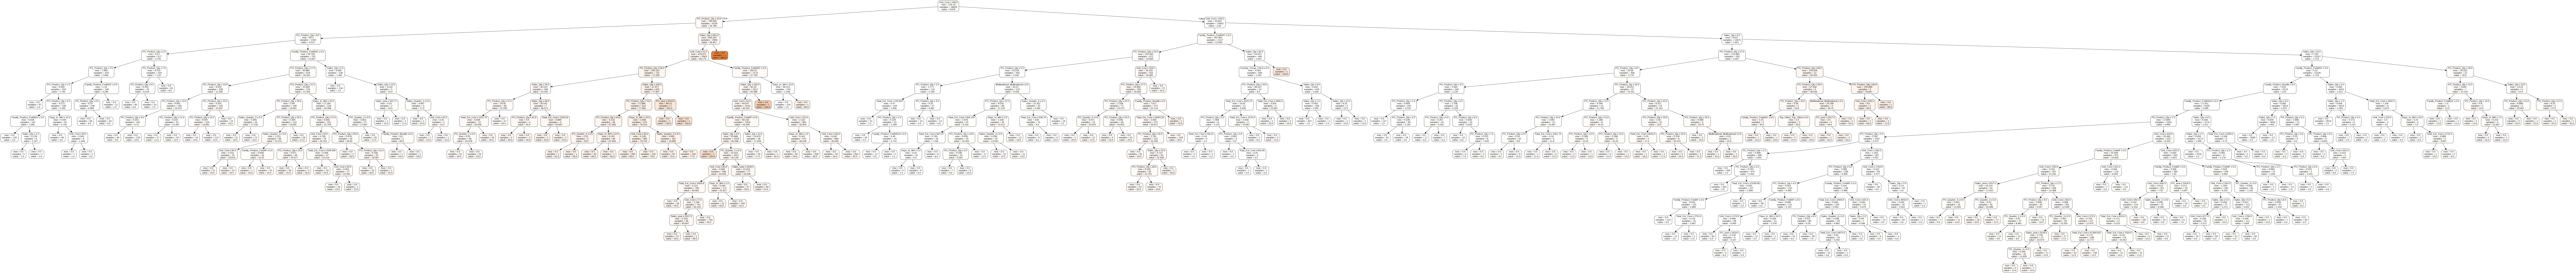

In [ ]:
dot_data = export_graphviz(tree_model,
                           feature_names= cols,
                           out_file=None,
                           filled=True,
                           rounded=True,
                           special_characters=True)

graph = pydot.graph_from_dot_data(dot_data)  
Image(graph[0].create_png())


Prediction

In [ ]:
y_pred = tree_model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: %f" % (rmse))

RMSE: 3.186269


In [ ]:
mape = mean_absolute_error(y_test, y_pred)
print("MAPE: %f" % (mape))

MAPE: 0.078448


## Random Forest Regressor

In [ ]:
random_forest = RandomForestRegressor(n_estimators= 100, min_samples_split = 3, random_state = 123)

random_forest.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)

In [ ]:
y_pred_2 = random_forest.predict(X_test)

In [ ]:
mse_2 = mean_squared_error(y_test, y_pred_2)
rmse_2 = np.sqrt(mse_2)

print("RMSE: %f" % (rmse_2))

RMSE: 3.014728


In [ ]:
mape_2 = mean_absolute_error(y_test, y_pred_2)
print("MAPE: %f" % (mape_2))

MAPE: 0.071008


## XG boost


In [ ]:
import xgboost as xgb

In [ ]:
seed = 123
test_size = 0.20 
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=test_size,
                                                    random_state=seed)

eval_set = [(X_test,y_test) ]

In [ ]:
model_3  = xgb.XGBRegressor(objective ='reg:linear', learning_rate = 0.3,
                max_depth = 15, n_estimators = 100)

In [ ]:
model_3.fit(X_train,y_train)

y_pred_3 = model_3.predict(X_test)

[08:10:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
rmse_3 = np.sqrt(mean_squared_error(y_test, y_pred_3))
print("RMSE: %f" % (rmse_3))

RMSE: 2.845430


In [ ]:
mape_3 = mean_absolute_error(y_test, y_pred_3)
print("MAPE: %f" % (mape_3))

MAPE: 0.065756


**XGBoost is the model with best results. 
Now we need to see  how this predicton is translated into our data set.**

### **Feature importance**

In [ ]:
!pip install shap

     |████████████████████████████████| 327kB 2.8MB/s 
  Created wheel for shap: filename=shap-0.36.0-cp36-cp36m-linux_x86_64.whl size=456465 sha256=0793817ea1d80ed810f0592ec797f7a45803c386e64fd574cb33e19c24b06d9e
  Stored in directory: /root/.cache/pip/wheels/fb/15/e1/8f61106790da27e0765aaa6e664550ca2c50ea339099e799f4
Successfully built shap


In [ ]:
rmse_4 = np.sqrt(mean_squared_error(y_test, y_pred_3))
print("RMSE: %f" % (rmse_4))

RMSE: 2.845430


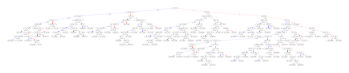

In [ ]:
xgb.plot_tree(model_3,num_trees=0)
plt.rcParams['figure.figsize'] = [100, 100]
plt.show()

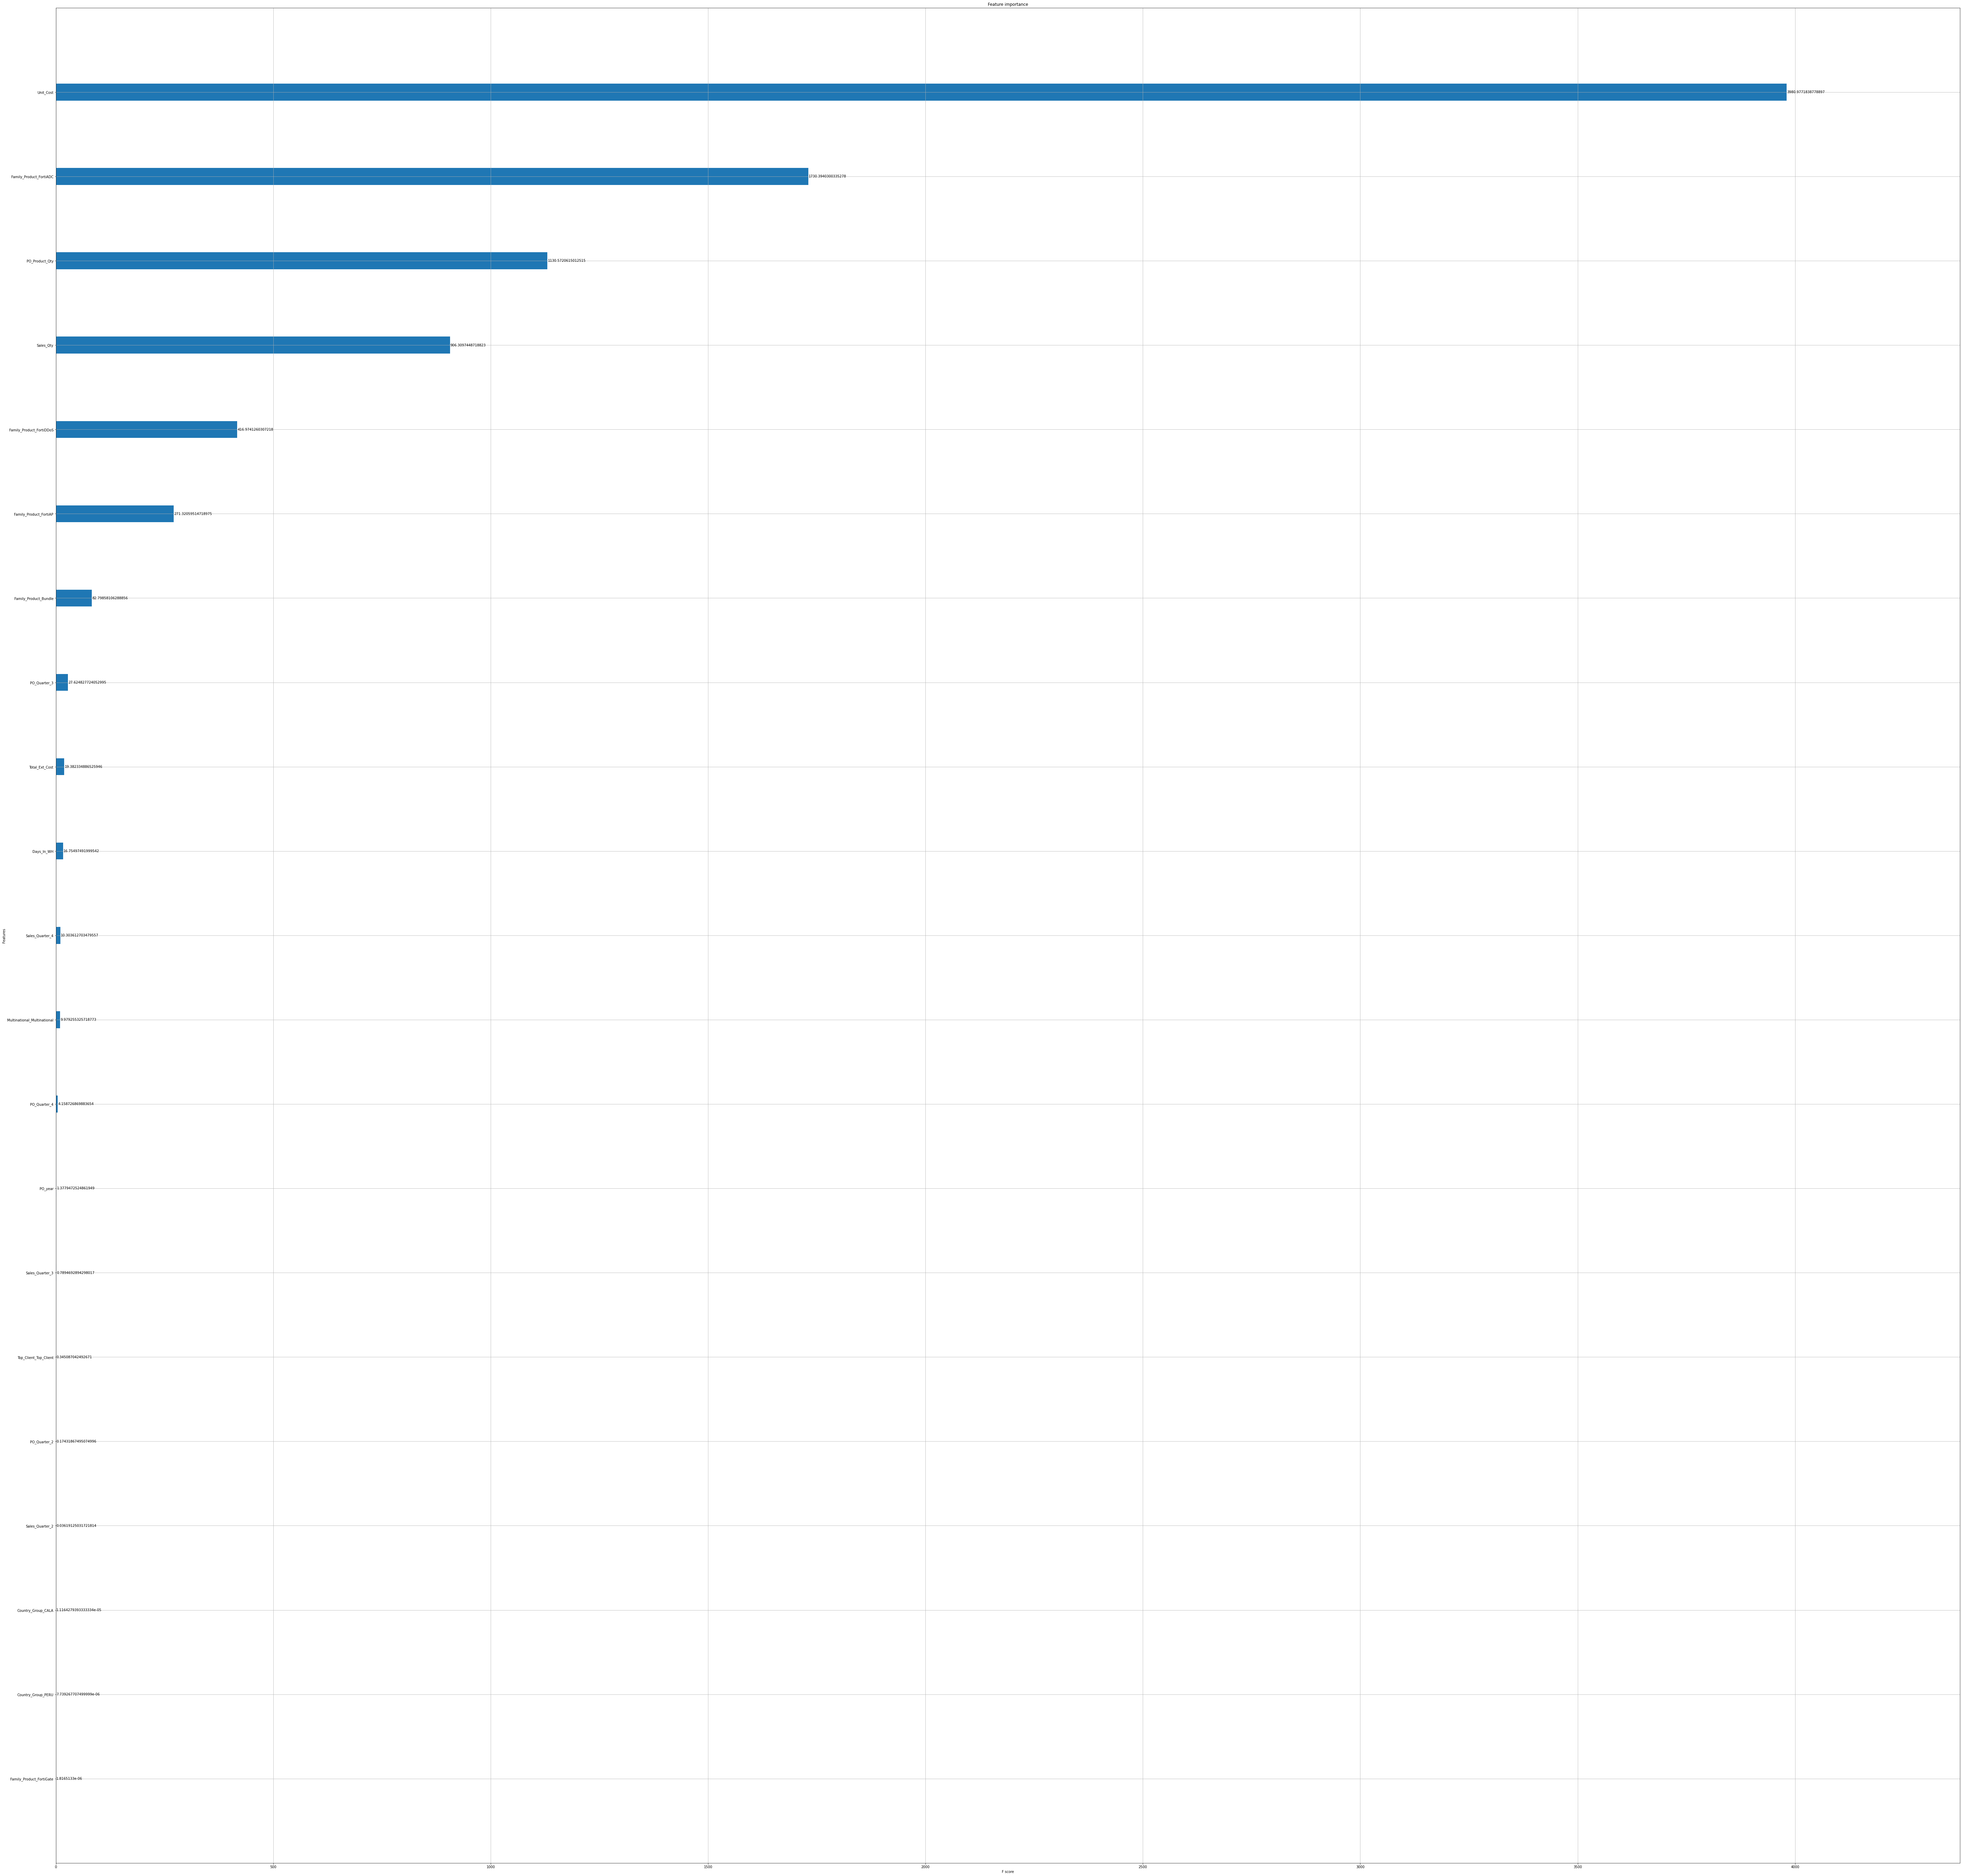

In [ ]:
xgb.plot_importance(model_3, importance_type='gain')
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

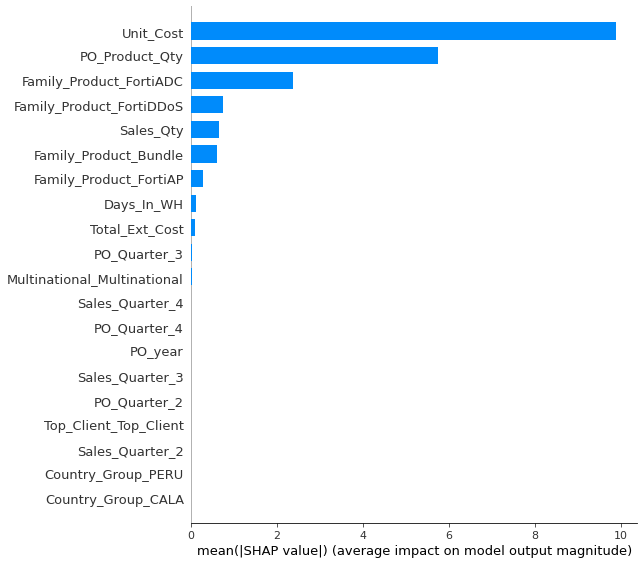

In [ ]:
import shap

shap_values = shap.TreeExplainer(model_3).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar", )

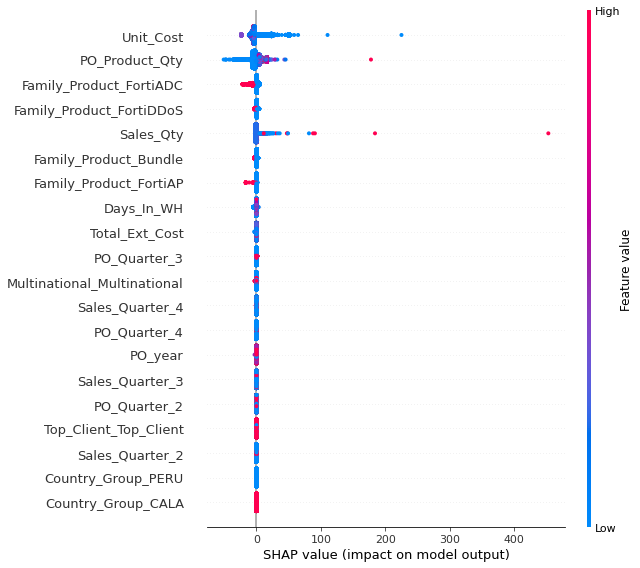

In [ ]:
shap.summary_plot(shap_values, X_train)

In [ ]:
shap_values = explainer(X)
shap.plots.bar(shap_values[0])

# PREDICTIONS INTO TEST DATASET

In [ ]:
final_prediction = y_pred_3
prediction = X_test.copy()
prediction['Prediction'] = final_prediction

In [ ]:
result = pd.concat([data, prediction], axis=1, join='inner')

In [ ]:
result

Family_Product  Multinational  ... Sales_Quarter_4 Prediction
8           FortiADC                 ...               0   1.000179
19         FortiDDoS  Multinational  ...               0   1.000207
20            Bundle                 ...               0   0.999921
23         FortiDDoS                 ...               0   0.999901
24         FortiDDoS  Multinational  ...               0   1.000146
...              ...            ...  ...             ...        ...
26881       FortiADC  Multinational  ...               0  44.376308
26882    Accessories  Multinational  ...               0   6.999077
26886      FortiDDoS  Multinational  ...               0   1.000071
26887      FortiDDoS                 ...               0   1.000039
26888      FortiDDoS                 ...               0   2.999943

[8069 rows x 47 columns]

In [ ]:
compression_opts = dict(method='zip',
                        archive_name='result_capstone_final_I.csv')  
result.to_csv('result_capstone_I.zip', index=False,
          compression=compression_opts)